In [73]:
import pandas as pd

# Getting the population for each county to merge to the main dataset used for this project

population = pd.read_csv('covid_county_population_usafacts.csv', usecols= ['countyFIPS', 'population'])

population = population[population.countyFIPS != 0]

population = population.set_index('countyFIPS')
population

,population
countyFIPS,
1001,55869
1003,223234
1005,24686
1007,22394
1009,57826
...,...
56037,42343
56039,23464
56041,20226


In [74]:
confirmed = pd.read_csv('covid_confirmed_usafacts.csv')
confirmed = confirmed.drop(confirmed.iloc[:, 4 : 864], axis=1)
confirmed = confirmed.drop(confirmed.iloc[:, 219 : 235], axis=1)

# New cases: taking difference
for i in range (5, len(confirmed.columns)):
    diff = confirmed[confirmed.columns[i]] - confirmed[confirmed.columns[i - 1]]
    confirmed[f'new_cases {confirmed.columns[i]}'] = diff

confirmed = confirmed.drop(confirmed.iloc[:, 4:219], axis= 1)
temp = {}
j = ((len(confirmed.columns) - 4) % 7) - 1

length = len(confirmed.columns) - 3
for i in range(4, len(confirmed.columns), 7):
    if (length) < (i + 7) :
        confirmed[f'{confirmed.columns[i]} - {confirmed.columns[i + j]} Sum'] = confirmed[confirmed.columns[i:i + j]].sum(axis=1)
        confirmed[f'{confirmed.columns[i]} - {confirmed.columns[i + j]} Mean'] = confirmed[confirmed.columns[i:i + j]].mean(axis=1).round()
        confirmed[f'{confirmed.columns[i]} - {confirmed.columns[i + j]} Median'] = confirmed[confirmed.columns[i:i + j]].median(axis=1).round()
        confirmed[f'{confirmed.columns[i]} - {confirmed.columns[i + j]} Mode'] = confirmed[confirmed.columns[i:i + j]].mode(axis=1)[0]
    else:
        confirmed[f'{confirmed.columns[i]} - {confirmed.columns[i + 6]} Sum'] = confirmed[confirmed.columns[i:i + 7]].sum(axis=1)
        confirmed[f'{confirmed.columns[i]} - {confirmed.columns[i + 6]} Mean'] = confirmed[confirmed.columns[i:i + 7]].mean(axis=1).round()
        confirmed[f'{confirmed.columns[i]} - {confirmed.columns[i + 6]} Median'] = confirmed[confirmed.columns[i:i + 7]].median(axis=1).round()
        confirmed[f'{confirmed.columns[i]} - {confirmed.columns[i + 6]} Mode'] = confirmed[confirmed.columns[i:i + 7]].mode(axis=1)[0]

confirmed.columns = confirmed.columns.str.replace('new_cases ', '')

confirmed

<ipython-input-74-7257bccebf1f>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  confirmed[f'new_cases {confirmed.columns[i]}'] = diff
<ipython-input-74-7257bccebf1f>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  confirmed[f'new_cases {confirmed.columns[i]}'] = diff
<ipython-input-74-7257bccebf1f>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-

,countyFIPS,County Name,State,StateFIPS,2022-06-01,2022-06-02,2022-06-03,2022-06-04,2022-06-05,2022-06-06,...,2022-12-14 - 2022-12-20 Median,2022-12-14 - 2022-12-20 Mode,2022-12-21 - 2022-12-27 Sum,2022-12-21 - 2022-12-27 Mean,2022-12-21 - 2022-12-27 Median,2022-12-21 - 2022-12-27 Mode,2022-12-28 - 2022-12-31 Sum,2022-12-28 - 2022-12-31 Mean,2022-12-28 - 2022-12-31 Median,2022-12-28 - 2022-12-31 Mode
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0
1,1001,Autauga County,AL,1,6,9,0,0,0,54,...,0.0,0.0,114,16.0,0.0,0.0,0,0.0,0.0,0.0
2,1003,Baldwin County,AL,1,68,68,0,0,0,247,...,0.0,0.0,275,39.0,0.0,0.0,0,0.0,0.0,0.0
3,1005,Barbour County,AL,1,3,4,0,0,0,5,...,0.0,0.0,20,3.0,0.0,0.0,0,0.0,0.0,0.0
4,1007,Bibb County,AL,1,8,4,0,0,0,22,...,0.0,0.0,24,3.0,0.0,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,0.0,0.0,20,3.0,0.0,0.0,0,0.0,0.0,0.0
3189,56039,Teton County,WY,56,0,0,0,0,0,0,...,0.0,0.0,29,4.0,0.0,0.0,0,0.0,0.0,0.0
3190,56041,Uinta County,WY,56,0,0,0,0,0,0,...,0.0,0.0,16,2.0,0.0,0.0,0,0.0,0.0,0.0
3191,56043,Washakie County,WY,56,0,0,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0


In [75]:
deaths = pd.read_csv("covid_deaths_usafacts.csv")

deaths = deaths.drop(deaths.iloc[:, 4 : 864], axis=1)
deaths = deaths.drop(deaths.iloc[:, 219 : 235], axis=1)

for i in range (5, len(deaths.columns)):
    diff = deaths[deaths.columns[i]] - deaths[deaths.columns[i - 1]]
    deaths[f'new_deaths {deaths.columns[i]}'] = diff

deaths = deaths.drop(deaths.iloc[:, 4:219], axis= 1)
temp = {}
j = ((len(deaths.columns) - 4) % 7) - 1

length = len(deaths.columns) - 3
for i in range(4, len(deaths.columns), 7):
    if (length) < (i + 7) :
        deaths[f'{deaths.columns[i]} - {deaths.columns[i + j]} Sum'] = deaths[deaths.columns[i:i + j]].sum(axis=1)
        deaths[f'{deaths.columns[i]} - {deaths.columns[i + j]} Mean'] = deaths[deaths.columns[i:i + j]].mean(axis=1).round()
        deaths[f'{deaths.columns[i]} - {deaths.columns[i + j]} Median'] = deaths[deaths.columns[i:i + j]].median(axis=1).round()
        deaths[f'{deaths.columns[i]} - {deaths.columns[i + j]} Mode'] = deaths[deaths.columns[i:i + j]].mode(axis=1)[0]
    else:
        deaths[f'{deaths.columns[i]} - {deaths.columns[i + 6]} Sum'] = deaths[deaths.columns[i:i + 7]].sum(axis=1)
        deaths[f'{deaths.columns[i]} - {deaths.columns[i + 6]} Mean'] = deaths[deaths.columns[i:i + 7]].mean(axis=1).round()
        deaths[f'{deaths.columns[i]} - {deaths.columns[i + 6]} Median'] = deaths[deaths.columns[i:i + 7]].median(axis=1).round()
        deaths[f'{deaths.columns[i]} - {deaths.columns[i + 6]} Mode'] = deaths[deaths.columns[i:i + 7]].mode(axis=1)[0]


deaths.columns = deaths.columns.str.replace('new_deaths ', '')
deaths

<ipython-input-75-dba1cc30b02f>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  deaths[f'new_deaths {deaths.columns[i]}'] = diff
<ipython-input-75-dba1cc30b02f>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  deaths[f'new_deaths {deaths.columns[i]}'] = diff
<ipython-input-75-dba1cc30b02f>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

,countyFIPS,County Name,State,StateFIPS,2022-06-01,2022-06-02,2022-06-03,2022-06-04,2022-06-05,2022-06-06,...,2022-12-14 - 2022-12-20 Median,2022-12-14 - 2022-12-20 Mode,2022-12-21 - 2022-12-27 Sum,2022-12-21 - 2022-12-27 Mean,2022-12-21 - 2022-12-27 Median,2022-12-21 - 2022-12-27 Mode,2022-12-28 - 2022-12-31 Sum,2022-12-28 - 2022-12-31 Mean,2022-12-28 - 2022-12-31 Median,2022-12-28 - 2022-12-31 Mode
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,0.0,0,2,0.0,0.0,0,0,0.0,0.0,0.0
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,0.0,0,1,0.0,0.0,0,0,0.0,0.0,0.0
3189,56039,Teton County,WY,56,0,0,0,0,0,0,...,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0
3190,56041,Uinta County,WY,56,0,0,0,0,0,0,...,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0
3191,56043,Washakie County,WY,56,0,0,0,0,0,0,...,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0


In [77]:
# Merging population to both confirmed and death dataframe

confirmed = confirmed.merge(population, how='left', on='countyFIPS')
deaths = deaths.merge(population, how='left', on='countyFIPS')
confirmed = confirmed.fillna(0)
deaths = deaths.fillna(0)



In [81]:
confirmed = confirmed.set_index('countyFIPS')
deaths = deaths.set_index('countyFIPS')
confirmed

,County Name,State,StateFIPS,2022-06-01,2022-06-02,2022-06-03,2022-06-04,2022-06-05,2022-06-06,2022-06-07,...,2022-12-14 - 2022-12-20 Mode,2022-12-21 - 2022-12-27 Sum,2022-12-21 - 2022-12-27 Mean,2022-12-21 - 2022-12-27 Median,2022-12-21 - 2022-12-27 Mode,2022-12-28 - 2022-12-31 Sum,2022-12-28 - 2022-12-31 Mean,2022-12-28 - 2022-12-31 Median,2022-12-28 - 2022-12-31 Mode,population
countyFIPS,,,,,,,,,,,,,,,,,,,,,
0,Statewide Unallocated,AL,1,0,0,0,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
1001,Autauga County,AL,1,6,9,0,0,0,54,20,...,0.0,114,16.0,0.0,0.0,0,0.0,0.0,0.0,55869.0
1003,Baldwin County,AL,1,68,68,0,0,0,247,60,...,0.0,275,39.0,0.0,0.0,0,0.0,0.0,0.0,223234.0
1005,Barbour County,AL,1,3,4,0,0,0,5,14,...,0.0,20,3.0,0.0,0.0,0,0.0,0.0,0.0,24686.0
1007,Bibb County,AL,1,8,4,0,0,0,22,1,...,0.0,24,3.0,0.0,0.0,0,0.0,0.0,0.0,22394.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,Sweetwater County,WY,56,0,0,0,0,0,0,0,...,0.0,20,3.0,0.0,0.0,0,0.0,0.0,0.0,42343.0
56039,Teton County,WY,56,0,0,0,0,0,0,0,...,0.0,29,4.0,0.0,0.0,0,0.0,0.0,0.0,23464.0
56041,Uinta County,WY,56,0,0,0,0,0,0,0,...,0.0,16,2.0,0.0,0.0,0,0.0,0.0,0.0,20226.0


In [82]:
deaths

,County Name,State,StateFIPS,2022-06-01,2022-06-02,2022-06-03,2022-06-04,2022-06-05,2022-06-06,2022-06-07,...,2022-12-14 - 2022-12-20 Mode,2022-12-21 - 2022-12-27 Sum,2022-12-21 - 2022-12-27 Mean,2022-12-21 - 2022-12-27 Median,2022-12-21 - 2022-12-27 Mode,2022-12-28 - 2022-12-31 Sum,2022-12-28 - 2022-12-31 Mean,2022-12-28 - 2022-12-31 Median,2022-12-28 - 2022-12-31 Mode,population
countyFIPS,,,,,,,,,,,,,,,,,,,,,
0,Statewide Unallocated,AL,1,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
1001,Autauga County,AL,1,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,55869.0
1003,Baldwin County,AL,1,0,0,0,0,0,0,0,...,0,2,0.0,0.0,0,0,0.0,0.0,0.0,223234.0
1005,Barbour County,AL,1,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,24686.0
1007,Bibb County,AL,1,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,22394.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,Sweetwater County,WY,56,0,0,0,0,0,0,0,...,0,1,0.0,0.0,0,0,0.0,0.0,0.0,42343.0
56039,Teton County,WY,56,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,23464.0
56041,Uinta County,WY,56,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,20226.0


In [83]:
# Only selecting new cases for Virginia
confirmed_VA = confirmed[confirmed['State'].str.contains('VA')]

# Generate weekly statistics (mean, median, mode) for number of new cases across a specific state.

confirmed_VA.filter(regex=r'County Name|State|StateFIPS|Mean|Median|Mode')

,County Name,State,StateFIPS,2022-06-01 - 2022-06-07 Mean,2022-06-01 - 2022-06-07 Median,2022-06-01 - 2022-06-07 Mode,2022-06-08 - 2022-06-14 Mean,2022-06-08 - 2022-06-14 Median,2022-06-08 - 2022-06-14 Mode,2022-06-15 - 2022-06-21 Mean,...,2022-12-07 - 2022-12-13 Mode,2022-12-14 - 2022-12-20 Mean,2022-12-14 - 2022-12-20 Median,2022-12-14 - 2022-12-20 Mode,2022-12-21 - 2022-12-27 Mean,2022-12-21 - 2022-12-27 Median,2022-12-21 - 2022-12-27 Mode,2022-12-28 - 2022-12-31 Mean,2022-12-28 - 2022-12-31 Median,2022-12-28 - 2022-12-31 Mode
countyFIPS,,,,,,,,,,,,,,,,,,,,,
0,Statewide Unallocated,VA,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51001,Accomack County,VA,51,8.0,5.0,0.0,8.0,4.0,0.0,9.0,...,0.0,11.0,6.0,0.0,11.0,13.0,0.0,2.0,0.0,0.0
51003,Albemarle County,VA,51,42.0,51.0,0.0,35.0,34.0,0.0,28.0,...,0.0,25.0,27.0,0.0,18.0,13.0,0.0,9.0,0.0,0.0
51005,Alleghany County,VA,51,0.0,0.0,0.0,6.0,4.0,0.0,4.0,...,0.0,3.0,2.0,0.0,5.0,4.0,0.0,4.0,0.0,0.0
51007,Amelia County,VA,51,3.0,0.0,0.0,4.0,5.0,0.0,2.0,...,0.0,3.0,1.0,0.0,3.0,4.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51800,City of Suffolk,VA,51,32.0,38.0,0.0,22.0,25.0,0.0,21.0,...,0.0,18.0,18.0,0.0,22.0,20.0,0.0,7.0,0.0,0.0
51810,City of Virginia Beach,VA,51,135.0,148.0,0.0,133.0,131.0,0.0,114.0,...,0.0,84.0,88.0,0.0,99.0,109.0,0.0,28.0,0.0,0.0
51820,City of Waynesboro,VA,51,4.0,1.0,0.0,5.0,3.0,0.0,3.0,...,0.0,7.0,3.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0


In [84]:
# Only selecting new death cases for Virginia
deaths_VA = deaths[deaths['State'].str.contains('VA')]

# Generate weekly statistics (mean, median, mode) for number of new deaths across a specific state.

deaths_VA.filter(regex=r'County Name|State|StateFIPS|Mean|Median|Mode')

,County Name,State,StateFIPS,2022-06-01 - 2022-06-07 Mean,2022-06-01 - 2022-06-07 Median,2022-06-01 - 2022-06-07 Mode,2022-06-08 - 2022-06-14 Mean,2022-06-08 - 2022-06-14 Median,2022-06-08 - 2022-06-14 Mode,2022-06-15 - 2022-06-21 Mean,...,2022-12-07 - 2022-12-13 Mode,2022-12-14 - 2022-12-20 Mean,2022-12-14 - 2022-12-20 Median,2022-12-14 - 2022-12-20 Mode,2022-12-21 - 2022-12-27 Mean,2022-12-21 - 2022-12-27 Median,2022-12-21 - 2022-12-27 Mode,2022-12-28 - 2022-12-31 Mean,2022-12-28 - 2022-12-31 Median,2022-12-28 - 2022-12-31 Mode
countyFIPS,,,,,,,,,,,,,,,,,,,,,
0,Statewide Unallocated,VA,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0
51001,Accomack County,VA,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0
51003,Albemarle County,VA,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0
51005,Alleghany County,VA,51,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0
51007,Amelia County,VA,51,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51800,City of Suffolk,VA,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0
51810,City of Virginia Beach,VA,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0
51820,City of Waynesboro,VA,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0


Compare the data against 3 other states. Normalize by population, use a normalization factor which is able to identify cases and deaths, for example try per 10,000 or 100,000 (this depends on the population). Plot the values across the weeks in a line plot for the 3 states in a single graph. Describe why the rates differ across these states in the notebook. Identify the peaks, are they consistent with the US pattern?

In [85]:
# VA Normalization data
confirmed_VA_norm = confirmed_VA.filter(regex = r'Sum|population')
confirmed_VA_norm = confirmed_VA_norm.sum()

deaths_VA_norm = deaths_VA.filter(regex = r'Sum|population')
deaths_VA_norm = deaths_VA_norm.sum()

confirmed_VA_norm

2022-06-01 - 2022-06-07 Sum      20652.0
2022-06-08 - 2022-06-14 Sum      19010.0
2022-06-15 - 2022-06-21 Sum      16895.0
2022-06-22 - 2022-06-28 Sum      18346.0
2022-06-29 - 2022-07-05 Sum      18866.0
2022-07-06 - 2022-07-12 Sum      20608.0
2022-07-13 - 2022-07-19 Sum      20676.0
2022-07-20 - 2022-07-26 Sum      21316.0
2022-07-27 - 2022-08-02 Sum      20965.0
2022-08-03 - 2022-08-09 Sum      19438.0
2022-08-10 - 2022-08-16 Sum      18025.0
2022-08-17 - 2022-08-23 Sum      17310.0
2022-08-24 - 2022-08-30 Sum      17543.0
2022-08-31 - 2022-09-06 Sum      14998.0
2022-09-07 - 2022-09-13 Sum      12588.0
2022-09-14 - 2022-09-20 Sum      10291.0
2022-09-21 - 2022-09-27 Sum       9286.0
2022-09-28 - 2022-10-04 Sum       7686.0
2022-10-05 - 2022-10-11 Sum       6871.0
2022-10-12 - 2022-10-18 Sum       7401.0
2022-10-19 - 2022-10-25 Sum       7025.0
2022-10-26 - 2022-11-01 Sum       7793.0
2022-11-02 - 2022-11-08 Sum       7207.0
2022-11-09 - 2022-11-15 Sum       6238.0
2022-11-16 - 202

In [86]:
deaths_VA_norm

2022-06-01 - 2022-06-07 Sum         46.0
2022-06-08 - 2022-06-14 Sum          8.0
2022-06-15 - 2022-06-21 Sum         24.0
2022-06-22 - 2022-06-28 Sum         91.0
2022-06-29 - 2022-07-05 Sum        115.0
2022-07-06 - 2022-07-12 Sum         82.0
2022-07-13 - 2022-07-19 Sum         68.0
2022-07-20 - 2022-07-26 Sum         54.0
2022-07-27 - 2022-08-02 Sum         92.0
2022-08-03 - 2022-08-09 Sum        116.0
2022-08-10 - 2022-08-16 Sum         98.0
2022-08-17 - 2022-08-23 Sum        104.0
2022-08-24 - 2022-08-30 Sum        108.0
2022-08-31 - 2022-09-06 Sum        104.0
2022-09-07 - 2022-09-13 Sum        132.0
2022-09-14 - 2022-09-20 Sum         81.0
2022-09-21 - 2022-09-27 Sum         96.0
2022-09-28 - 2022-10-04 Sum         93.0
2022-10-05 - 2022-10-11 Sum         85.0
2022-10-12 - 2022-10-18 Sum         71.0
2022-10-19 - 2022-10-25 Sum         81.0
2022-10-26 - 2022-11-01 Sum         66.0
2022-11-02 - 2022-11-08 Sum         27.0
2022-11-09 - 2022-11-15 Sum          2.0
2022-11-16 - 202

In [87]:
# Preparing data for visualization/plotting
VA_norm_10k_cases = {}
VA_norm_100k_cases = {}
VA_norm_10k_deaths = {}
VA_norm_100k_deaths = {}
for x in range(0, len(confirmed_VA_norm) - 1):
    VA_norm_10k_cases[f'{confirmed_VA_norm.index.values[x]} normalized'] = (confirmed_VA_norm[x]/confirmed_VA_norm['population']) * 10000
    VA_norm_100k_cases[f'{confirmed_VA_norm.index.values[x]} normalized'] = (confirmed_VA_norm[x]/confirmed_VA_norm['population']) * 100000
    
for x in range(0, len(deaths_VA_norm) - 1):
    VA_norm_10k_deaths[f'{deaths_VA_norm.index.values[x]} normalized'] = (deaths_VA_norm[x]/deaths_VA_norm['population']) * 10000
    VA_norm_100k_deaths[f'{deaths_VA_norm.index.values[x]} normalized'] = (deaths_VA_norm[x]/deaths_VA_norm['population']) * 100000
    

In [88]:
def normalization(state, x, case_or_death):
    d = pd.DataFrame
    if(case_or_death == 'case'):
        d = confirmed[confirmed['State'].str.contains(state)]
    else:
        d = deaths[deaths['State'].str.contains(state)]
        
    d = d.filter(regex = r'Sum|population')
    d = d.sum()

    if(x == 10):
        norm_10k_cases = {}
        for x in range(0, len(d) - 1):
            norm_10k_cases[f'{d.index.values[x]} normalized'] = (d[x]/d['population']) * 10000
        
        return norm_10k_cases
    elif(x == 100):
        norm_100k_cases = {}
        for x in range(0, len(d) - 1):
            norm_100k_cases[f'{d.index.values[x]} normalized'] = (d[x] / d['population']) * 100000
    
        return norm_100k_cases

In [89]:
# California normalization data
CA_norm_10k_cases = normalization('CA', 10, 'case')
CA_norm_100k_cases = normalization('CA', 100, 'case')
CA_norm_10k_deaths = normalization('CA', 10, 'deaths')
CA_norm_100k_deaths = normalization('CA', 100, 'deaths')

# North Carolina normalization data
NC_norm_10k_cases = normalization('NC', 10, 'case')
NC_norm_100k_cases = normalization('NC', 100, 'case')
NC_norm_10k_deaths = normalization('NC', 10, 'deaths')
NC_norm_100k_deaths = normalization('NC', 100, 'deaths')

# New York normalization data
NY_norm_10k_cases = normalization('NY', 10, 'case')
NY_norm_100k_cases = normalization('NY', 100, 'case')
NY_norm_10k_deaths = normalization('NY', 10, 'deaths')
NY_norm_100k_deaths = normalization('NY', 100, 'deaths')

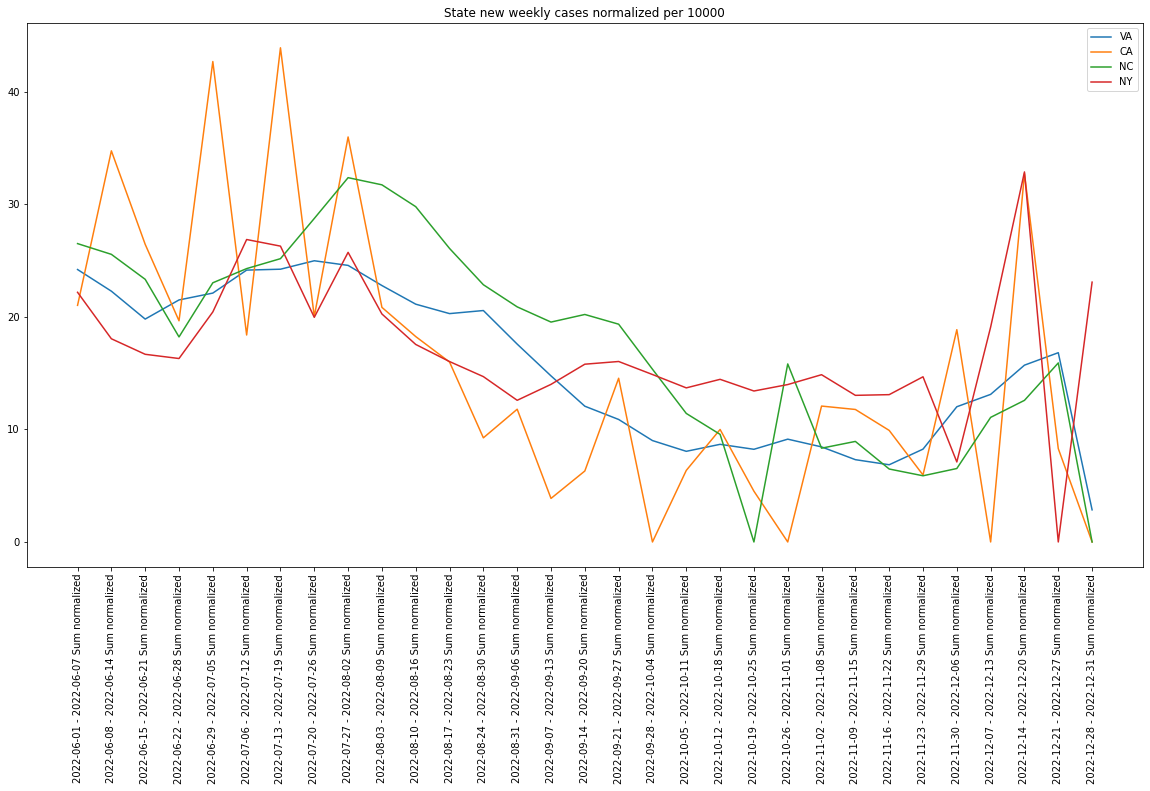

In [93]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 10))
plt.title('State new weekly cases normalized per 10000')
plt.plot(VA_norm_10k_cases.keys(), VA_norm_10k_cases.values(), label = 'VA')
plt.plot(CA_norm_10k_cases.keys(), CA_norm_10k_cases.values(), label = 'CA')
plt.plot(NC_norm_10k_cases.keys(), NC_norm_10k_cases.values(), label = 'NC')
plt.plot(NY_norm_10k_cases.keys(), NY_norm_10k_cases.values(), label = 'NY')
plt.xticks(rotation=90)

plt.legend()
plt.show()

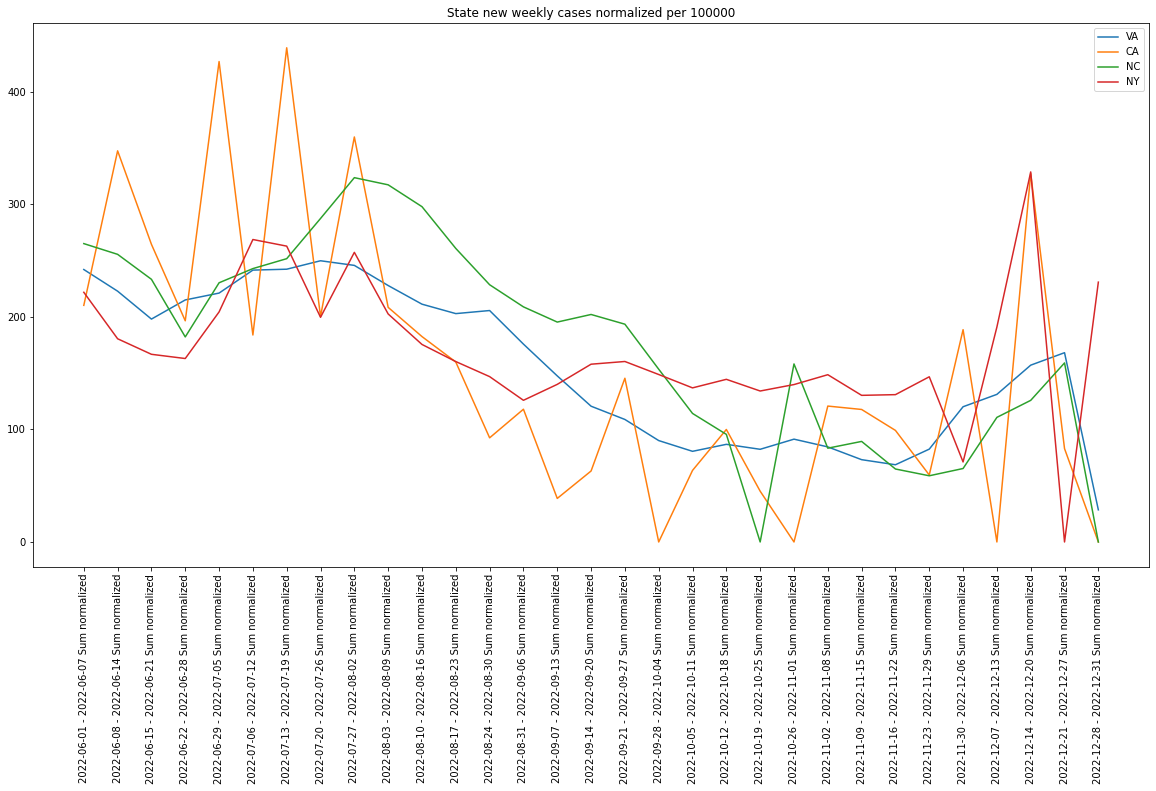

In [94]:
plt.figure(figsize=(20, 10))
plt.title('State new weekly cases normalized per 100000')
plt.plot(VA_norm_100k_cases.keys(), VA_norm_100k_cases.values(), label = 'VA')
plt.plot(CA_norm_100k_cases.keys(), CA_norm_100k_cases.values(), label = 'CA')
plt.plot(NC_norm_100k_cases.keys(), NC_norm_100k_cases.values(), label = 'NC')
plt.plot(NY_norm_100k_cases.keys(), NY_norm_100k_cases.values(), label = 'NY')
plt.xticks(rotation=90)

plt.legend()
plt.show()

Describe why the rates differ across these states in the notebook. Identify the peaks, are they consistent with the US pattern?

If we look at the rates of cases across the states like Virginia, North Carolina, New York, and California, they rate of Covid cases are different. This is due to couple of reason:
    One of the main reasons is the difference in population density. California and New York are two of the states that have higher population density than other two states. Although California only ranks 17th and New York slightly higher in the population density table, the earlier state has the highest population in comparison to other states. In addition to that, some of the largest cities in the United States are in California, so this another reason why California has a higher case rate.
    Another reason is that California is a big state, so they have capacity to allow more Covid-19 testing. 


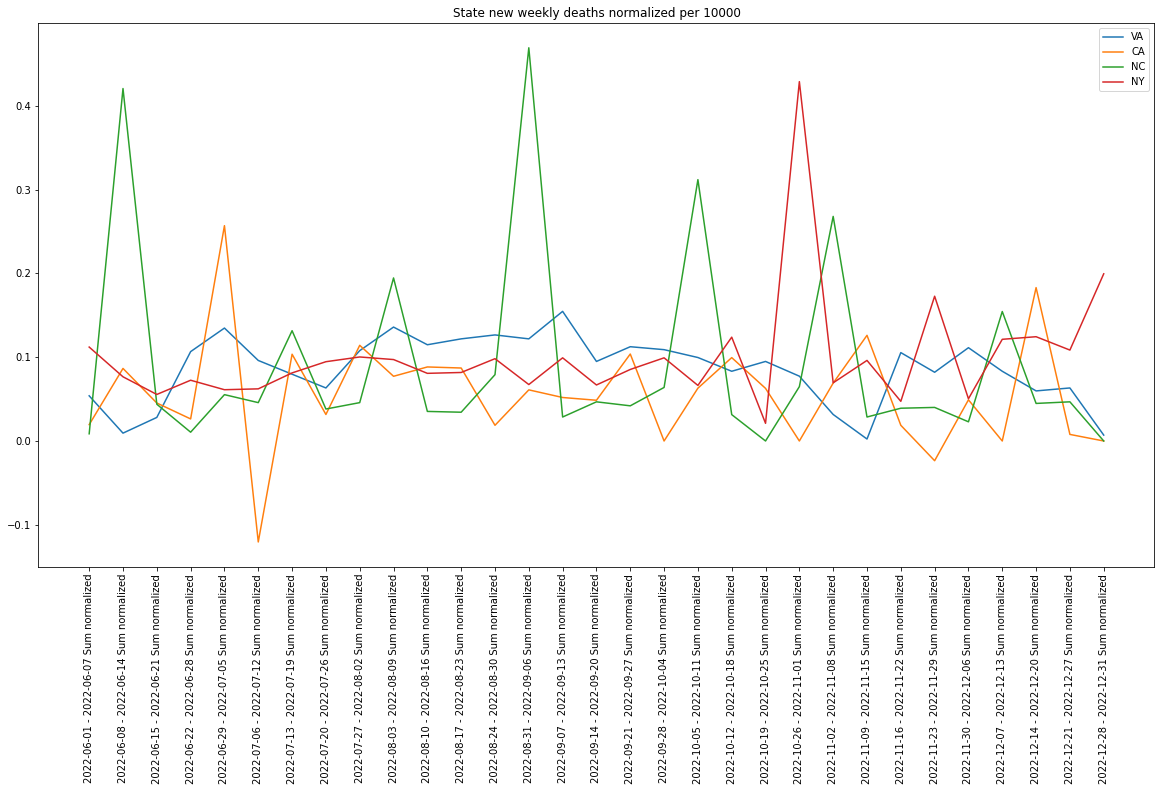

In [95]:
plt.figure(figsize=(20, 10))
plt.title('State new weekly deaths normalized per 10000')
plt.plot(VA_norm_10k_deaths.keys(), VA_norm_10k_deaths.values(), label = 'VA')
plt.plot(CA_norm_10k_deaths.keys(), CA_norm_10k_deaths.values(), label = 'CA')
plt.plot(NC_norm_10k_deaths.keys(), NC_norm_10k_deaths.values(), label = 'NC')
plt.plot(NY_norm_10k_deaths.keys(), NY_norm_10k_deaths.values(), label = 'NY')
plt.xticks(rotation=90)

plt.legend()
plt.show()

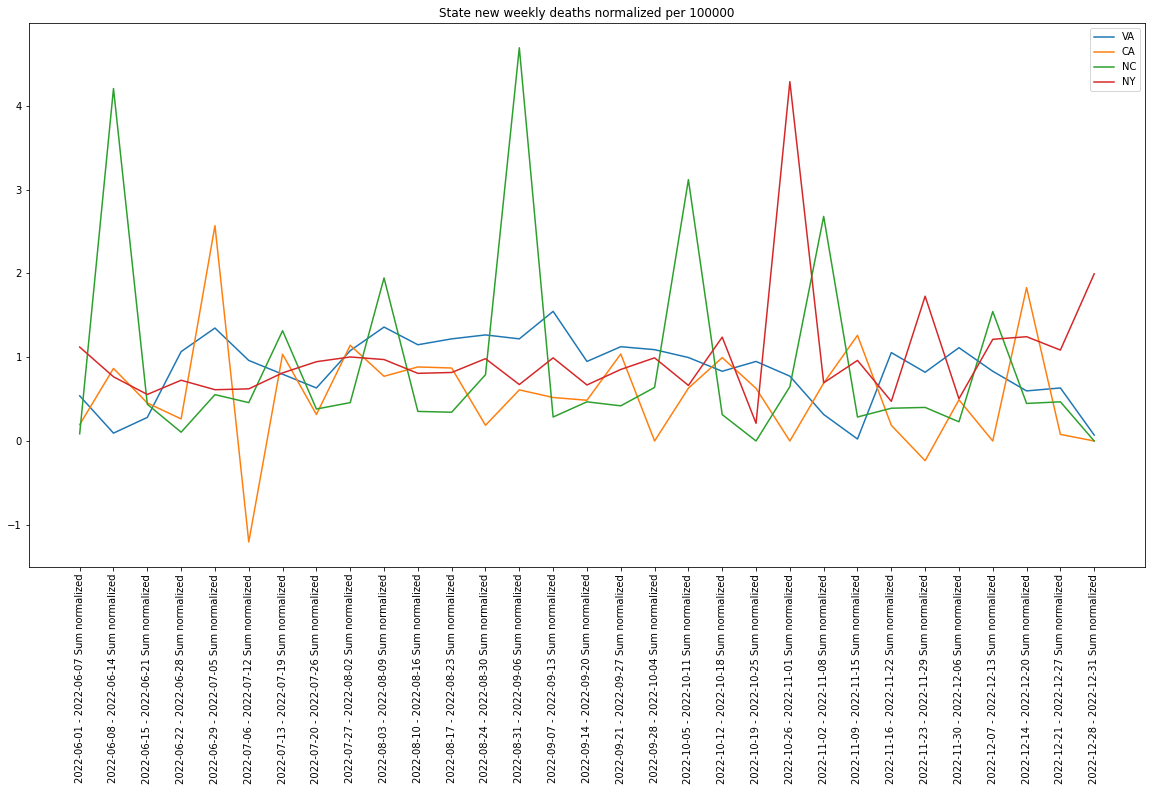

In [96]:
plt.figure(figsize=(20, 10))
plt.title('State new weekly deaths normalized per 100000')
plt.plot(VA_norm_100k_deaths.keys(), VA_norm_100k_deaths.values(), label = 'VA')
plt.plot(CA_norm_100k_deaths.keys(), CA_norm_100k_deaths.values(), label = 'CA')
plt.plot(NC_norm_100k_deaths.keys(), NC_norm_100k_deaths.values(), label = 'NC')
plt.plot(NY_norm_100k_deaths.keys(), NY_norm_100k_deaths.values(), label = 'NY')
plt.xticks(rotation=90)

plt.legend()
plt.show()

If we look at the death rates across the states like Virginia, North Carolina, New York, and California, the death rate is higher in North Carolina in comparison to other states. This might be due to:
Age distribution of people living in North Carolina. North Carolina has a greater number of older populations in comparison to other states in the US.
Furthermore, North Carolina has higher number of poverty as well as people with chronic health conditions which impact the death rate. 


US has the highest peak of Covid cases in the week 2022-07-13 to 2022-07-19. If we look at the rates at the state level, California also has its highest Covid rate in the same period. Also, other states have also their highest Covid rates around this date, for instance New York has it highest peak one week before this period, North Carolina after 2 weeks and Virginia after one week. 
US has the highest peak of Covid deaths in the week 2022-11-09 to 2022-11-15. If we look at the rates at the state level, they are not consistent with the US pattern, but we can see slight increase in the death rates in comparison to previous week. 


Identify 3 counties within a state of your choice with high cases and death rates.

In [97]:
top_3_cases_counties = confirmed_VA.sum(axis=1).sort_values(ascending=False).head(3)

print('Top 3 counties within VA with high cases: ')
for i in top_3_cases_counties.index:
    print(confirmed_VA.loc[i]['County Name'])

Top 3 counties within VA with high cases: 
Fairfax County 
Prince William County 
City of Virginia Beach


<ipython-input-97-c5e52ec9d109>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  top_3_cases_counties = confirmed_VA.sum(axis=1).sort_values(ascending=False).head(3)


In [98]:
top_3_deaths_counties = deaths_VA.sum(axis=1).sort_values(ascending=False).head(3)

print('\nTop 3 counties within VA with high deaths: ')
for i in top_3_deaths_counties.index:
    print(deaths_VA.loc[i]['County Name'])


Top 3 counties within VA with high deaths: 
Fairfax County 
Prince William County 
City of Virginia Beach


<ipython-input-98-a9b325780328>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  top_3_deaths_counties = deaths_VA.sum(axis=1).sort_values(ascending=False).head(3)


In [99]:
import numpy as np
def normalization_log_county(county, case_or_death):
    d = pd.DataFrame
    if (case_or_death == 'case'):
        d = confirmed.loc[county]
    else:
        d = deaths.loc[county]

    d = d.filter(regex=r'Sum|population')

    norm_log_cases = {}
    for x in range(0, len(d) - 1):
        norm_log_cases[f'{d.index.values[x]} log_normal'] = np.log((d[x] + 1e-6)/d['population'])

    return norm_log_cases

Show plots by raw values cases:

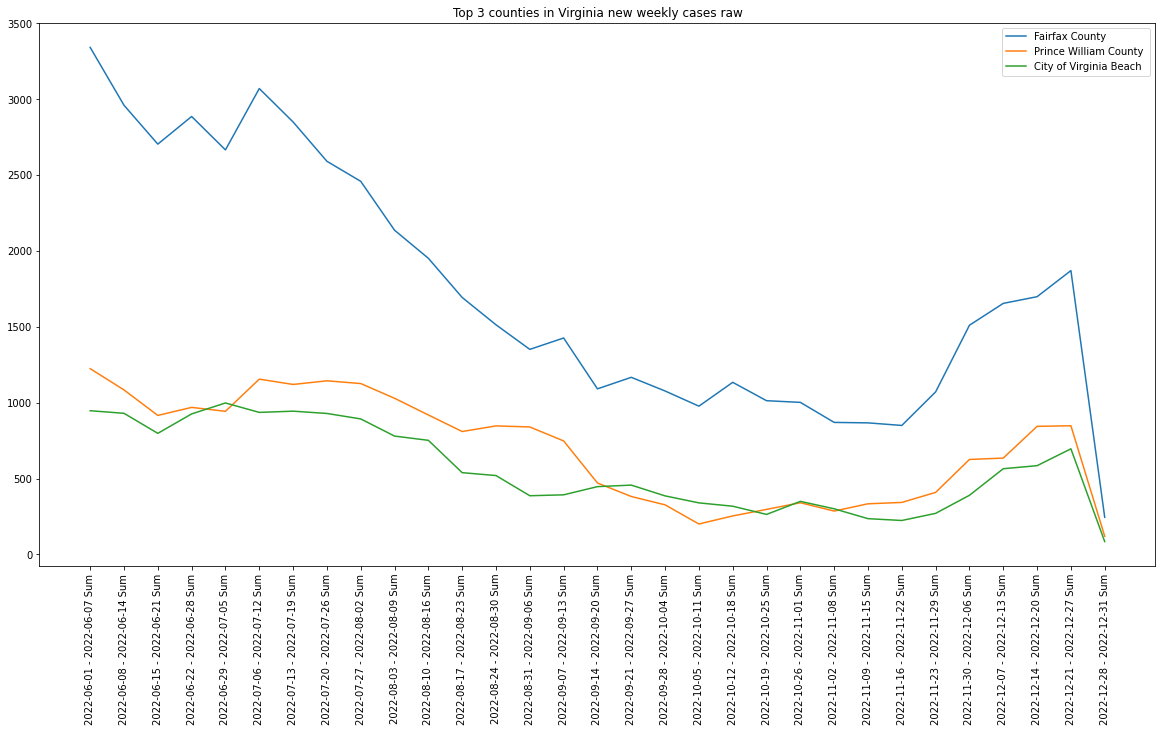

In [100]:
data = {}
for i in top_3_cases_counties.head(3).index:
    data[confirmed_VA.loc[i]['County Name']] = confirmed_VA.loc[i].filter(regex = 'Sum')

ind = []
val = []

plt.figure(figsize=(20, 10))
plt.title('Top 3 counties in Virginia new weekly cases raw')
for i in data:
    ind = data[i].index
    val = data[i].values
    plt.plot(ind, val, label = i)
    
plt.xticks(rotation=90)
plt.legend()
plt.show()

Show plots by log normalized values:

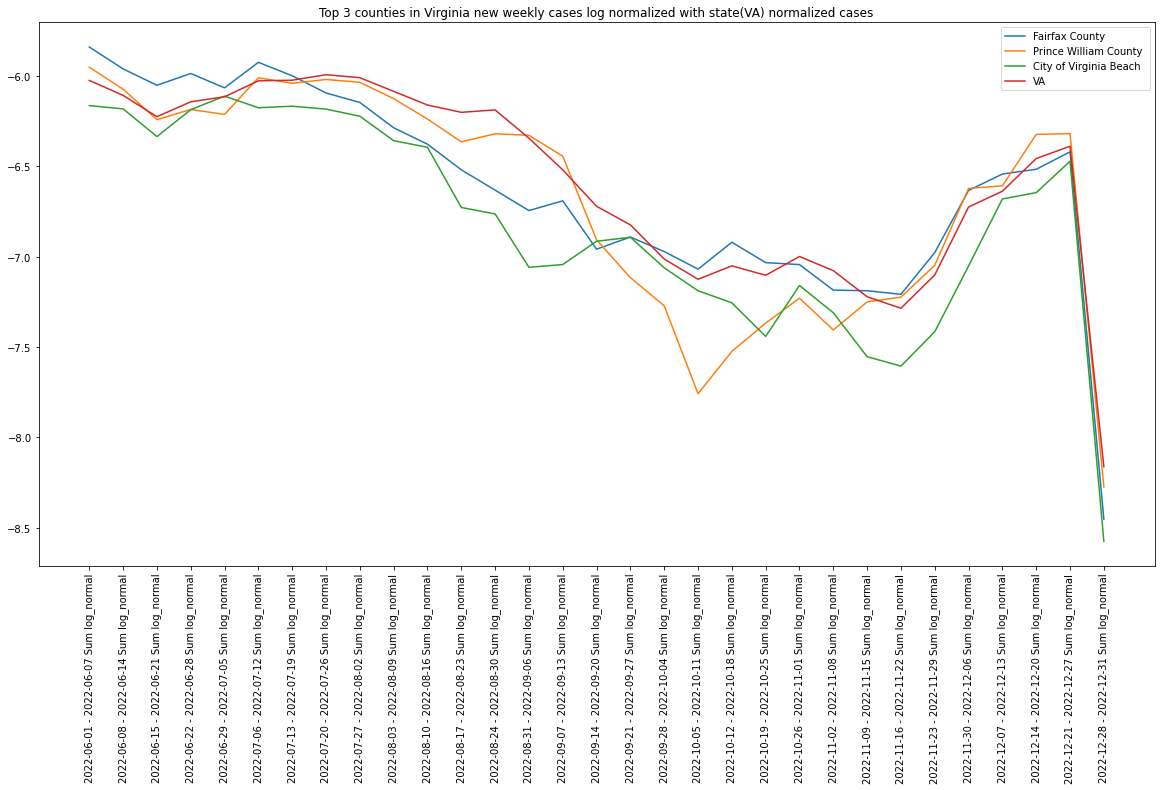

In [102]:
VA_log_norm = confirmed_VA.filter(regex = 'Sum|population')

d = VA_log_norm.sum()

VA_norm_log_cases = {}
for x in range(0, len(d) - 1):
    VA_norm_log_cases[f'{d.index[x]} log_normal'] = np.log((d[x] + 1e-6)/d['population'])

plt.figure(figsize=(20, 10))
plt.title('Top 3 counties in Virginia new weekly cases log normalized with state(VA) normalized cases')

for i in range(3):
    
    data = {}
    data = normalization_log_county(top_3_cases_counties.index[i], 'case')
    plt.plot(list(data), data.values(), label = confirmed_VA.loc[top_3_cases_counties.index[i]]['County Name'])
plt.plot(list(VA_norm_log_cases), VA_norm_log_cases.values(), label = 'VA')
    
plt.xticks(rotation=90)
plt.legend()
plt.show()


Describe what is causing them and what were the peaks. Do the counties follow state pattern.

As we can visualize in this plot, the covid cases in the second half of the year is decreasing until the end of November. This might be because the weather is starting to get colder and people do not really want to go out that often and prefer to stay warm inside. However, we do see an increase in cases from end of November and have a peak during the Christmas weekend. During Christmas people tend to spend the times with their families so it makes perfect sense that the Covid cases hits its peak during this time of the year. More people together means more chances of spreading the virus. 

If we compare the state pattern with the counties, we see that the patterns are realtively similar which makes sense. It makes sense because Fairfax, Prince William and City of Virginia Beach are larger counties so whenever these counties encounter increase/decrease in cases, the state is affected and follows this pattern too. 

Show plots by raw values deaths:

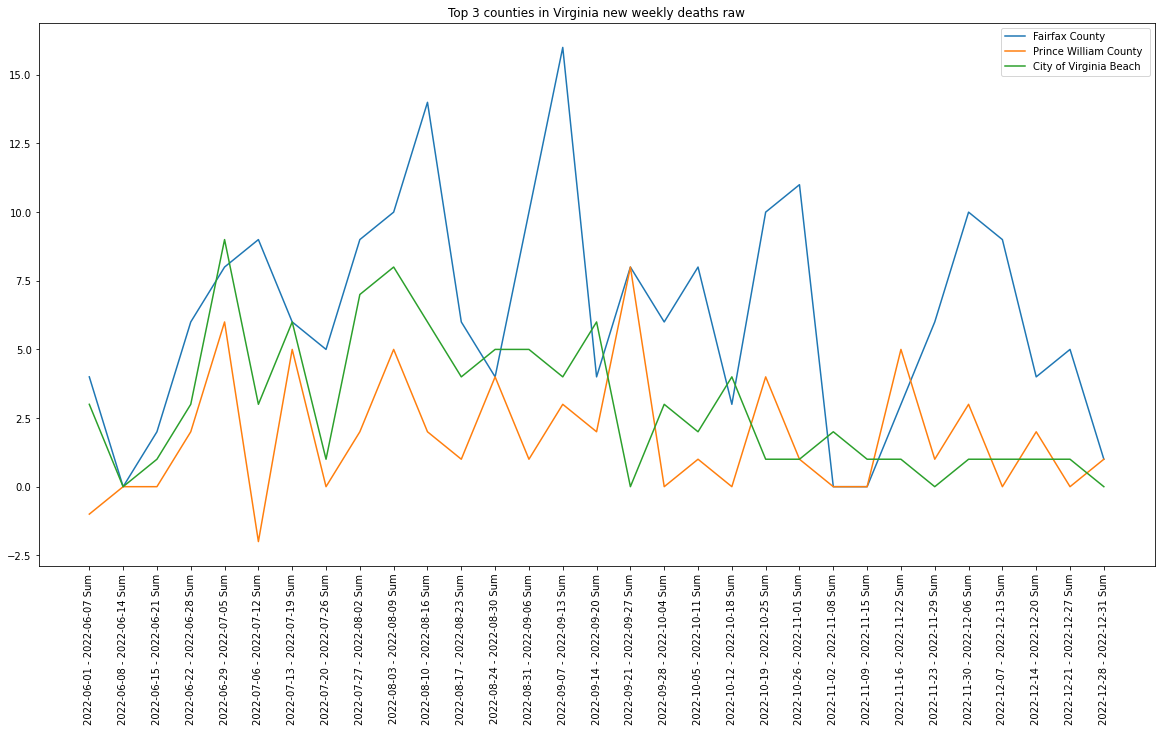

In [103]:
data = {}
for i in top_3_deaths_counties.head(3).index:
    data[deaths_VA.loc[i]['County Name']] = deaths_VA.loc[i].filter(regex = 'Sum')

plt.figure(figsize=(20, 10))
plt.title('Top 3 counties in Virginia new weekly deaths raw')

for i in data:
    ind = data[i].index
    val = data[i].values
    plt.plot(ind, val, label = i)
    
plt.xticks(rotation=90)
plt.legend()
plt.show()

Show plots by log normalized values deaths

<ipython-input-99-ba5ea108e04f>:13: RuntimeWarning: invalid value encountered in log
  norm_log_cases[f'{d.index.values[x]} log_normal'] = np.log((d[x] + 1e-6)/d['population'])


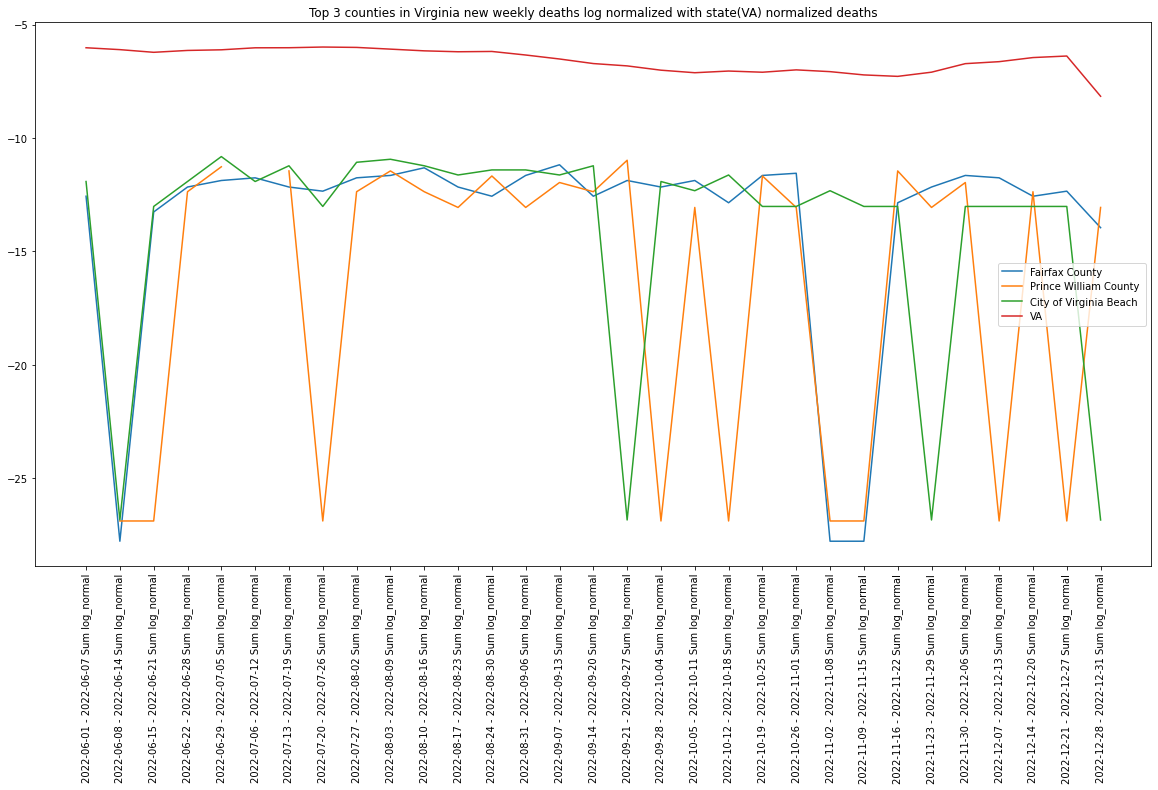

In [104]:
VA_log_norm_deaths = deaths_VA.filter(regex = 'Sum|population')

d = VA_log_norm_deaths.sum()

VA_norm_log_deaths = {}
for x in range(0, len(d) - 1):
    VA_norm_log_deaths[f'{d.index[x]} log_normal'] = np.log((d[x] + 1e-6)/d['population'])
    
plt.figure(figsize=(20, 10))
plt.title('Top 3 counties in Virginia new weekly deaths log normalized with state(VA) normalized deaths')

for i in range(3):
    
    data = {}
    data = normalization_log_county(top_3_deaths_counties.index[i], 'death')
    plt.plot(list(data), data.values(), label = deaths_VA.loc[top_3_cases_counties.index[i]]['County Name'])
    
plt.plot(list(VA_norm_log_cases), VA_norm_log_cases.values(), label = 'VA')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Initially looking at the death cases pattern, we see that the Prince William county and City of Virginia Beach has a lot of weeks where the death rate was zero and sometimes even negative. The later might be due to an error in recording the numbers. When we look at the Fairfax county's plot, the death rate hits the highest peak on the week of 2022-08-31, but the death rate is stable in this county. This might be due to the fact that Fairfax county is one of the largest populated county in Virginia and most of the population is old.
If we compare the state pattern to the counties, we see that only Fairfax county tend to follow similar pattern as the state pattern. If we were to ignore zero cases or negative cases, Prince William county and City of Virginia Beach do have similar trend to that of Virginia. 